In [1]:
#Coursera - Applied Data Science Capstone Project
#Topic: What determines an adult's physical height?

#import libraries
import numpy as np
import pandas as pd
import urllib.request # import the library we use to open URLs
import requests # library to handle requests
from bs4 import BeautifulSoup # import the BeautifulSoup library so we can parse HTML and XML documents

In [2]:
#First, find the top 10 tallest and top 10 shortest countries via aggregating and averaging multiple data sources - men and women
url= "http://www.averageheight.co/average-male-height-by-country"
page=urllib.request.urlopen(url)
soup= BeautifulSoup(page, "lxml")# parse the HTML from our URL into the BeautifulSoup parse tree format
table= soup.find_all('table')[0] # Grab the first table

In [3]:
def tableDataText(table):    
    """Parses a html segment started with tag <table> followed 
    by multiple <tr> (table rows) and inner <td> (table data) tags. 
    It returns a list of rows with inner columns. 
    Accepts only one <th> (table header/data) in the first row.
    """
    def rowgetDataText(tr, coltag='td'): # td (data) or th (header)       
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]  
    rows = []
    trs = table.find_all('tr')
    headerow = rowgetDataText(trs[0], 'th')
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append(rowgetDataText(tr, 'td') ) # data row       
    return rows

In [4]:
htmltable = soup.find('table', { 'class' : 'display' })
list_table = tableDataText(htmltable)
list_table[:2]
df_AvgHeightCo = pd.DataFrame(list_table[1:], columns=list_table[0]) #dataframe for URL: averageheight.co

In [5]:
df_AvgHeightCo["Height (in)"]="" #add column for height in inches

In [6]:
df_AvgHeightCo["Height (m)"]=df_AvgHeightCo["Height (m)"].astype(float) #convert objects in column to float
df_AvgHeightCo["Height (in)"]=39.37007874*df_AvgHeightCo["Height (m)"] #39.37007874 inches in 1 meter - convert to inches since it is a US study

In [7]:
df_AvgHeightCo=df_AvgHeightCo.drop(['Continent','Height (m)','Height (ft)'], axis=1) #drop columns that provide no valuable insight to the study

In [8]:
decimals = 2    
df_AvgHeightCo['Height (in)'] = df_AvgHeightCo['Height (in)'].apply(lambda x: round(x, decimals)) #round the decimals in height (in)
df_ah=df_AvgHeightCo.sort_values("Country")
df_ah.head() #dataframe 1 on average country height complete - now to compile other dataframes

,Country,Height (in)
0,Albania,68.50
1,Algeria,67.80
2,Argentina,68.70
3,Australia,69.13
4,Austria,70.55


In [9]:
url2 = "http://www.ncdrisc.org/downloads/height/NCD_RisC_eLife_2016_height_age18_countries.csv"
df=pd.read_csv(url2)

In [10]:
array= ['1996']
df_1996 = df.loc[df['Year of birth'].isin(array)]
df_men = df_1996.loc[df['Sex'] == 'Men']

In [11]:
df2=df_men.drop(['ISO','Mean height lower 95% uncertainty interval (cm)', "Mean height upper 95% uncertainty interval (cm)"], axis=1) 
df3=df2.drop(['Sex','Year of birth'], axis=1)

In [12]:
df3["Height (in)"]=""
df3["Height (in)"]=0.3937007874*df3["Mean height (cm)"]
decimals1 = 2    
df3['Height (in)'] = df3['Height (in)'].apply(lambda x: round(x, decimals1))
df_nc = df3.drop(['Mean height (cm)'], axis=1)#dataframe 2 on average country height complete - one more to go
df_nc.head()

,Country,Height (in)
100,Afghanistan,65.06
201,Albania,68.26
302,Algeria,66.96
403,American Samoa,69.31
504,Andorra,69.32


In [13]:
#Third data source on average height from World data
from urllib.request import Request, urlopen
url2= "http://www.worlddata.info/average-bodyheight.php#by-population"
req = Request(url2 , headers={'User-Agent': 'Google Chrome/85.0.4183.83'})

webpage = urlopen(req).read()
page_soup = soup(webpage, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]><html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7 "> <![endif]-->
<!--[if IE 7]><html class="no-js lt-ie10 lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]><html class="no-js lt-ie10 lt-ie9"> <![endif]-->
<!--[if IE 9]><html class="no-js lt-ie10"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <!-- Basic Page Needs -->
  <meta charset="utf-8"/>
  <!-- Mobile Specific Metas -->
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <!-- Favicons -->
  <link href="http://d28u20f0bzkbnx.cloudfront.net/favicon.ico" rel="shortcut icon"/>
  <link href="assets/avg_hght/slide-menu/slidebars.css" rel="stylesheet"/>
  <link href="assets/avg_hght/slide-menu/style.css" rel="stylesheet"/>
  <link href="http://www.averageheight.co/assets/avg_hght/imgs/avghght_57x57.png" rel="apple-touch-icon"/>
  <script type="text/javascript">
   // RELOADS WEBPAGE WHEN MOBILE ORIENTATION CHANGES	
		    wind

In [14]:
table3= soup.find_all('table')[0]
table3

<table cellspacing="0" class="display" id="mens-height" width="100%">
<thead>
<tr>
<th>Country</th>
<th>Continent</th>
<th>Height (m)</th>
<th>Height (ft)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Albania</td>
<td>Europe</td>
<td>1.740</td>
<td>5' 8.5"</td>
</tr>
<tr>
<td>Algeria</td>
<td>Africa</td>
<td>1.722</td>
<td>5' 7.75"</td>
</tr>
<tr>
<td>Argentina</td>
<td>South America</td>
<td>1.745</td>
<td>5' 8.5"</td>
</tr>
<tr>
<td>Australia</td>
<td>Oceania</td>
<td>1.756</td>
<td>5' 9"</td>
</tr>
<tr>
<td>Austria</td>
<td>Europe</td>
<td>1.792</td>
<td>5'10.5"</td>
</tr>
<tr>
<td>Azerbaijan</td>
<td>Asia</td>
<td>1.718</td>
<td>5' 7.75"</td>
</tr>
<tr>
<td>Bahrain</td>
<td>Asia</td>
<td>1.651</td>
<td>5' 5"</td>
</tr>
<tr>
<td>Belgium</td>
<td>Europe</td>
<td>1.786</td>
<td>5'10.25"</td>
</tr>
<tr>
<td>Bolivia</td>
<td>South America</td>
<td>1.600</td>
<td>5' 3"</td>
</tr>
<tr>
<td>Brazil</td>
<td>South America</td>
<td>1.731</td>
<td>5' 8.25"</td>
</tr>
<tr>
<td>Bosnia &amp; Herzegovina</

In [15]:
htmltable3 = soup.find('table', { 'class' : 'display' })
list_table3 = tableDataText(htmltable3)
df4 = pd.DataFrame(list_table3[1:], columns=list_table3[0]) #dataframe for URL: worlddata.info
df4["Height (in)"]=""
pd.to_numeric(df4["Height (m)"])
m2in=39.37007874
df4["Height (m)"] = df4["Height (m)"].astype(float)
df4["Height (in)"]=[i * m2in for i in df4["Height (m)"]]

In [16]:
df4 = df4.drop(['Height (m)','Height (ft)'], axis=1)
df4["Height (in)"] = list(np.around(np.array(df4["Height (in)"]),2))
df_wd = df4.sort_values('Country')

In [17]:
#Take all 3 lists of average height per country, then aggregate and average to come up with final list
df1=df_ah
df2=df_nc
df3=df_wd

In [18]:
df31= df3.merge(df1, on="Country", how="left")
df_height= df31.merge(df2, on="Country", how="left")
df_height['Average Height(in)']=df_height.mean(axis=1)
df_height

,Country,Continent,Height (in)_x,Height (in)_y,Height (in),Average Height(in)
0,Albania,Europe,68.50,68.50,68.26,68.420000
1,Algeria,Africa,67.80,67.80,66.96,67.520000
2,Argentina,South America,68.70,68.70,68.75,68.716667
3,Australia,Oceania,69.13,69.13,70.55,69.603333
4,Austria,Europe,70.55,70.55,69.85,70.316667
...,...,...,...,...,...,...
96,United States,North America,69.41,69.41,NaN,69.410000
97,Uruguay,South America,66.93,66.93,68.28,67.380000
98,Uzbekistan,Asia,69.06,69.06,66.69,68.270000
99,Venezuela,South America,66.54,66.54,67.56,66.880000


In [19]:
df_height=df_height.drop(['Continent','Height (in)_x','Height (in)_y','Height (in)'],axis=1)
df_height=df_height.sort_values('Average Height(in)')
df_short=df_height.head(10)
df_short#top 10 shortest countries (male) on average - reference dataframe

,Country,Average Height(in)
35,Indonesia,62.930000
100,Vietnam,63.820000
8,Bolivia,63.890000
69,Philippines,63.913333
60,Nepal,64.080000
12,Cambodia,64.086667
83,Sri Lanka,64.683333
68,Peru,64.730000
63,Nigeria,64.766667
22,Ecuador,64.840000


In [20]:
df_tall=df_height.tail(10)
df_tall=df_tall.sort_values(by=["Average Height(in)"], ascending=False)
df_tall#top 10 tallest countries (male) on average - reference dataframe

,Country,Average Height(in)
9,Bosnia & Herzegovina,72.400000
61,Netherlands,72.193333
21,Denmark,71.730000
58,Montenegro,71.483333
77,Serbia,71.463333
64,Norway,71.463333
33,Iceland,71.193333
28,Germany,71.113333
18,Croatia,71.096667
20,Czech Republic,70.956667


In [21]:
Tlist= df_tall["Country"].to_list()
Tlist

['Bosnia & Herzegovina',
 'Netherlands',
 'Denmark',
 'Montenegro',
 'Serbia',
 'Norway',
 'Iceland',
 'Germany',
 'Croatia',
 'Czech Republic']

In [22]:
Slist=df_short['Country'].to_list()
Slist

['Indonesia',
 'Vietnam',
 'Bolivia',
 'Philippines',
 'Nepal',
 'Cambodia',
 'Sri Lanka',
 'Peru',
 'Nigeria',
 'Ecuador']

In [23]:
#Diet - Meat and Dairy consumption per capita - the next step is finding out the average meat and dairy consumption per capita in each of the countries on the top 10 tallest and shortest list
url_meat1='https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption'
url_meat2='https://data.oecd.org/agroutput/meat-consumption.htm'

In [24]:
page=urllib.request.urlopen(url_meat1)
soup= BeautifulSoup(page, "lxml")# parse the HTML from our URL into the BeautifulSoup parse tree format
print(soup.prettify()) #print results of the web page scrape

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by meat consumption - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"948e18cb-1002-4ef9-aea8-57d5d8123f17","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_meat_consumption","wgTitle":"List of countries by meat consumption","wgCurRevisionId":972186656,"wgRevisionId":972186656,"wgArticleId":43733130,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata

In [25]:
table_meat1 = soup.find('table', class_='wikitable sortable')
table_meat1

<table class="wikitable sortable">
<caption>Countries by meat consumption per capita
</caption>
<tbody><tr>
<th>Country</th>
<th>kg/person (2002)<sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[9]</a></sup><sup class="reference" id="cite_ref-11"><a href="#cite_note-11">[note 1]</a></sup></th>
<th>kg/person (2009)<sup class="reference" id="cite_ref-FAO2013_10-1"><a href="#cite_note-FAO2013-10">[10]</a></sup></th>
<th>kg/person (2017)<sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[11]</a></sup>
</th></tr>
<tr>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="700" data-file-width="980" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/21px-Flag_of_Albania.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/32px-Flag_of_Albania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/42px-Flag_of_Albania.svg.png

In [26]:
A=[]
B=[]
C=[]

for row in table_meat1.findAll('tr'):
    cells=row.find_all('td')
    if len(cells)==4:
        A.append(cells[0].a['title'])
        B.append(cells[2].find(text=True))
        C.append(cells[3].find(text=True).strip())

In [27]:
df_meat1=pd.DataFrame(A,columns=['Country'])
df_meat1['kg/person (2009)']=B
df_meat1['kg/person (2017)']=C
del df_meat1['kg/person (2017)']
df_meat1.rename(columns={'kg/person (2009)':'Meat per capita (kg/person)'}, inplace=True)
df_meat1

,Country,Meat per capita (kg/person)
0,Albania,None
1,Algeria,19.5
2,American Samoa,26.8
3,Angola,22.4
4,Antigua and Barbuda,84.3
...,...,...
183,Venezuela,76.8
184,Vietnam,49.9
185,Yemen,17.9
186,Zambia,12.3


In [28]:
dfm_tall=df_meat1[df_meat1['Country'].isin(Tlist)]
dfm_bos=df_meat1.loc[df_meat1['Country']=='Bosnia and Herzegovina'] #separate because Bosnia is spelled differently in this list
dfm_tall= dfm_tall.append(dfm_bos, ignore_index=True)
dfm_tall['Country']=dfm_tall['Country'].replace(['Bosnia and Herzegovina'],'Bosnia & Herzegovina')
dfm_tall

,Country,Meat per capita (kg/person)
0,Croatia,66.3
1,Czech Republic,83.4
2,Denmark,95.2
3,Germany,88.1
4,Iceland,86.2
5,Montenegro,57.7
6,Netherlands,85.5
7,Norway,66
8,Serbia,45.2
9,Bosnia & Herzegovina,27.9


In [29]:
dfm_short=df_meat1[df_meat1['Country'].isin(Slist)]
dfm_short

,Country,Meat per capita (kg/person)
19,Bolivia,59.1
26,Cambodia,16.6
48,Ecuador,56.4
77,Indonesia,11.6
116,Nepal,9.9
123,Nigeria,8.8
131,Peru,20.8
132,Philippines,33.6
158,Sri Lanka,6.3
184,Vietnam,49.9


In [30]:
#Dairy table (1) - Exported to Excel 'https://ourworldindata.org/grapher/per-capita-milk-consumption?tab=table&time=1961..2013'
#Did not use =COSTS MONEY -'https://www.statista.com/statistics/272003/global-annual-consumption-of-milk-by-region/'
url_dairy2= 'http://chartsbin.com/view/1491'

In [31]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_979fb0bd6ca84d6fbdc10b219e1f99fb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5aGRX9eGsKm6GrHsGETbpehupZt2PmY-8UPYA3jTztVf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_979fb0bd6ca84d6fbdc10b219e1f99fb.get_object(Bucket='courseracapstoneithacavsnycdining-donotdelete-pr-uzr7jumgw9hvt5',Key='per-capita-milk-consumption.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [32]:
df_dairy1 = pd.read_csv(body)
df_dairy1.rename(columns={'Milk - Excluding Butter - Food supply quantity (kg/capita/yr) (FAO, 2020)':'Milk Consumption (kg/person)'}, inplace=True)
df_dairy1.rename(columns={'Entity':'Country'}, inplace=True)
df_dairy1.head(20)

,Country,Milk Consumption (kg/person)
0,Afghanistan,54.19
1,Albania,396.34
2,Algeria,121.71
3,Angola,9.49
4,Antigua and Barbuda,80.62
5,Argentina,158.94
6,Armenia,200.09
7,Australia,219.48
8,Austria,230.63
9,Azerbaijan,131.82


In [33]:
dfd_tall=df_dairy1[df_dairy1['Country'].isin(Tlist)]
dfd_bos=df_dairy1.loc[df_dairy1['Country']=='Bosnia and Herzegovina'] #separate because Bosnia is spelled differently in this list
dfd_tall= dfd_tall.append(dfd_bos, ignore_index=True)
dfd_tall=dfd_tall.sort_values(by=["Country"], ascending=True)
dfd_tall

,Country,Milk Consumption (kg/person)
9,Bosnia and Herzegovina,197.24
0,Croatia,242.15
1,Czech Republic,190.93
2,Denmark,307.03
3,Germany,267.52
4,Iceland,255.76
5,Montenegro,389.91
6,Netherlands,340.35
7,Norway,252.82
8,Serbia,173.12


In [34]:
dfd_tall['Country']=dfd_tall['Country'].replace(['Bosnia and Herzegovina'],'Bosnia & Herzegovina')
dfd_tall

,Country,Milk Consumption (kg/person)
9,Bosnia & Herzegovina,197.24
0,Croatia,242.15
1,Czech Republic,190.93
2,Denmark,307.03
3,Germany,267.52
4,Iceland,255.76
5,Montenegro,389.91
6,Netherlands,340.35
7,Norway,252.82
8,Serbia,173.12


In [35]:
dfd_short=df_dairy1[df_dairy1['Country'].isin(Slist)]
dfd_short=dfd_short.sort_values(by=["Country"], ascending=True)
dfd_short

,Country,Milk Consumption (kg/person)
17,Bolivia,47.75
23,Cambodia,3.31
43,Ecuador,107.93
69,Indonesia,6.74
108,Nepal,54.12
114,Nigeria,2.18
121,Peru,56.68
122,Philippines,1.20
143,Sri Lanka,11.19
168,Vietnam,8.66


In [36]:
#Wealth - GDP per Capita for each country - the next step is finding out how rich each country in the top 10 tallest and shortest list is
body1 = client_979fb0bd6ca84d6fbdc10b219e1f99fb.get_object(Bucket='courseracapstoneithacavsnycdining-donotdelete-pr-uzr7jumgw9hvt5',Key='WorldBankGDPpc.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_wealth = pd.read_csv(body1)
df_wealth.head()

,Country Name,2016,2017,2018,2019
0,Aruba,28281.350480,29007.693000,NaN,NaN
1,Afghanistan,547.228110,556.302002,524.162881,502.115487
2,Angola,3506.072885,4095.812942,3289.646664,2973.591160
3,Albania,4124.055726,4531.020806,5284.380184,5352.857411
4,Andorra,37474.665410,38962.880350,41793.055260,40886.391160


In [37]:
col = df_wealth.loc[: , "2016":"2019"]
df_wealth['GDP/capita'] = col.mean(axis=1)
df_wealth = df_wealth.drop(['2016','2017','2018','2019'], axis=1)
df_wealth.rename(columns={'Country Name':'Country'}, inplace=True)
df_wealth.head(30)

,Country,GDP/capita
0,Aruba,28644.521740
1,Afghanistan,532.452120
2,Angola,3466.280913
3,Albania,4823.078532
4,Andorra,39779.248045
5,Arab World,6345.714385
6,United Arab Emirates,41432.332553
7,Argentina,12268.051110
8,Armenia,4087.388579
9,American Samoa,11329.030357


In [38]:
dfw_tall=df_wealth[df_wealth['Country'].isin(Tlist)]
dfw_bos=df_wealth.loc[df_wealth['Country']=='Bosnia and Herzegovina'] #separate because Bosnia is spelled differently in this list
dfw_tall= dfw_tall.append(dfw_bos, ignore_index=True)
dfw_tall['Country']=dfw_tall['Country'].replace(['Bosnia and Herzegovina'],'Bosnia & Herzegovina')
dfw_tall=dfw_tall.sort_values(by=["Country"], ascending=True)
dfw_tall

,Country,GDP/capita
9,Bosnia & Herzegovina,5633.680139
3,Croatia,13886.563333
0,Czech Republic,21248.002362
2,Denmark,58254.461045
1,Germany,45086.597960
4,Iceland,68172.818240
5,Montenegro,8129.786401
6,Netherlands,50044.750727
7,Norway,75777.509250
8,Serbia,6672.280136


In [39]:
dfw_short=df_wealth[df_wealth['Country'].isin(Slist)]
dfw_short=dfw_short.sort_values(by=["Country"], ascending=True)
dfw_short

,Country,GDP/capita
26,Bolivia,3382.110476
121,Cambodia,1452.524834
64,Ecuador,6188.338457
104,Indonesia,3857.478294
176,Nepal,949.573567
172,Nigeria,2101.786916
184,Peru,6708.609230
185,Philippines,3233.516096
136,Sri Lanka,3974.246510
255,Vietnam,2459.927298


In [40]:
#merging height, meat, and dairy tables
#df_tall=df_tall.sort_values(by=["Country"], ascending=True) #sort tables by country to match up and merge
#df_short=df_short.sort_values(by=["Country"], ascending=True)
#dfm_tall=dfm_tall.sort_values(by=["Country"], ascending=True) #sort tables by country to match up and merge
#dfm_short=dfm_short.sort_values(by=["Country"], ascending=True)
#dfd_tall=dfd_tall.sort_values(by=["Country"], ascending=True) #sort tables by country to match up and merge
#dfd_short=dfd_short.sort_values(by=["Country"], ascending=True)
dft = (df_tall, dfm_tall, dfd_tall, dfw_tall)
for df in dft:
    df.sort_values('Country', ascending=True, inplace=True)

In [41]:
from functools import reduce
df_tall = reduce(lambda x, y: pd.merge(x, y, on='Country', how='outer'), dft)
df_tall

,Country,Average Height(in),Meat per capita (kg/person),Milk Consumption (kg/person),GDP/capita
0,Bosnia & Herzegovina,72.400000,27.9,197.24,5633.680139
1,Croatia,71.096667,66.3,242.15,13886.563333
2,Czech Republic,70.956667,83.4,190.93,21248.002362
3,Denmark,71.730000,95.2,307.03,58254.461045
4,Germany,71.113333,88.1,267.52,45086.597960
5,Iceland,71.193333,86.2,255.76,68172.818240
6,Montenegro,71.483333,57.7,389.91,8129.786401
7,Netherlands,72.193333,85.5,340.35,50044.750727
8,Norway,71.463333,66,252.82,75777.509250
9,Serbia,71.463333,45.2,173.12,6672.280136


In [42]:
dfs = (df_short, dfm_short, dfd_short, dfw_short)
for df in dfs:
    df.sort_values('Country', ascending=True, inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [43]:
from functools import reduce
df_short = reduce(lambda x, y: pd.merge(x, y, on='Country', how='outer'), dfs)
#del df_short['Milk Consumption (kg/person)_y']
#del df_short['Meat per capita (kg/person)_y']
#df_short=df_short.rename(columns={'Meat per capita (kg/person)_x':'Meat per capita (kg/person)'})
#df_short=df_short.rename(columns={'Milk Consumption (kg/person)_x':'Milk Consumption (kg/person)'})
df_short

,Country,Average Height(in),Meat per capita (kg/person),Milk Consumption (kg/person),GDP/capita
0,Bolivia,63.890000,59.1,47.75,3382.110476
1,Cambodia,64.086667,16.6,3.31,1452.524834
2,Ecuador,64.840000,56.4,107.93,6188.338457
3,Indonesia,62.930000,11.6,6.74,3857.478294
4,Nepal,64.080000,9.9,54.12,949.573567
5,Nigeria,64.766667,8.8,2.18,2101.786916
6,Peru,64.730000,20.8,56.68,6708.609230
7,Philippines,63.913333,33.6,1.20,3233.516096
8,Sri Lanka,64.683333,6.3,11.19,3974.246510
9,Vietnam,63.820000,49.9,8.66,2459.927298


In [44]:
df_tall['Meat per capita (kg/person)']= pd.to_numeric(df_tall['Meat per capita (kg/person)'], downcast='float')
df_short['Meat per capita (kg/person)']= pd.to_numeric(df_short['Meat per capita (kg/person)'], downcast='float')
df_tall.dtypes

Country                          object
Average Height(in)              float64
Meat per capita (kg/person)     float32
Milk Consumption (kg/person)    float64
GDP/capita                      float64
dtype: object

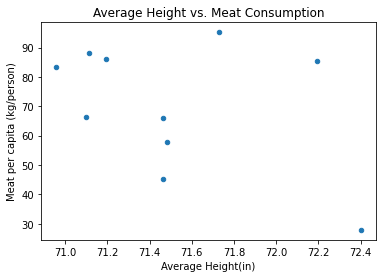

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#sets environment to directly plot charts
df_tall.plot.scatter(x='Average Height(in)',y="Meat per capita (kg/person)", title= 'Average Height vs. Meat Consumption')

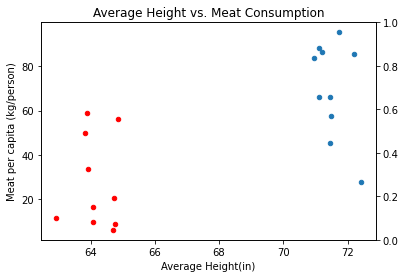

In [46]:
fig, ax=plt.subplots()
ax2=ax.twinx()
df_tall.plot.scatter(x='Average Height(in)',y="Meat per capita (kg/person)", title= 'Average Height vs. Meat Consumption', ax=ax)
df_short.plot.scatter(x='Average Height(in)',y="Meat per capita (kg/person)", color=['red'], ax=ax)

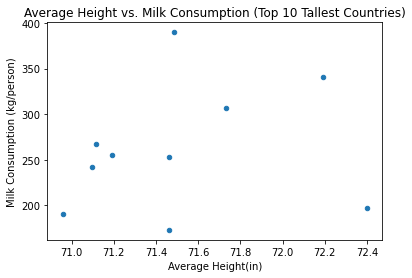

In [47]:
df_tall.plot.scatter(x='Average Height(in)',y="Milk Consumption (kg/person)", title= 'Average Height vs. Milk Consumption (Top 10 Tallest Countries)')

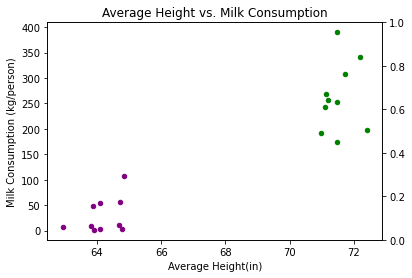

In [48]:
fig, ax=plt.subplots()
ax2=ax.twinx()
df_tall.plot.scatter(x='Average Height(in)',y="Milk Consumption (kg/person)", title= 'Average Height vs. Milk Consumption', color=['green'], ax=ax)
df_short.plot.scatter(x='Average Height(in)',y="Milk Consumption (kg/person)", color=['purple'], ax=ax)

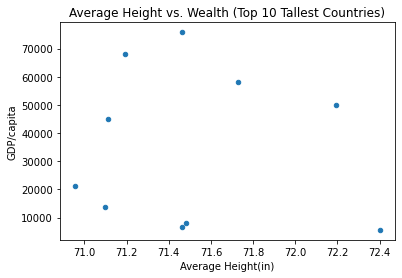

In [50]:
df_tall.plot.scatter(x='Average Height(in)',y="GDP/capita", title= 'Average Height vs. Wealth (Top 10 Tallest Countries)')

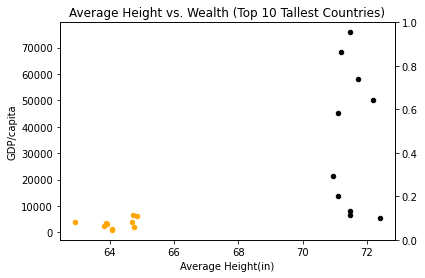

In [52]:
fig, ax=plt.subplots()
ax2=ax.twinx()
df_tall.plot.scatter(x='Average Height(in)',y="GDP/capita", title= 'Average Height vs. Wealth', color=['black'], ax=ax)
df_short.plot.scatter(x='Average Height(in)',y="GDP/capita", color=['orange'], ax=ax)

In [55]:
df_tall.corr(method='pearson')

,Average Height(in),Meat per capita (kg/person),Milk Consumption (kg/person),GDP/capita
Average Height(in),1.000000,-0.407616,0.184665,-0.075160
Meat per capita (kg/person),-0.407616,1.000000,0.364677,0.668420
Milk Consumption (kg/person),0.184665,0.364677,1.000000,0.243456
GDP/capita,-0.075160,0.668420,0.243456,1.000000


In [56]:
df_short.corr(method='pearson')

,Average Height(in),Meat per capita (kg/person),Milk Consumption (kg/person),GDP/capita
Average Height(in),1.000000,-0.022082,0.418089,0.341007
Meat per capita (kg/person),-0.022082,1.000000,0.471510,0.299032
Milk Consumption (kg/person),0.418089,0.471510,1.000000,0.563470
GDP/capita,0.341007,0.299032,0.563470,1.000000
